In [2]:
# imports 
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt
import seaborn as sns

# prep for tufte ready plots
sns.set(style= 'ticks', palette= 'Set2');
# sns.despine();

# prep for latex-like plots
plt.rc('text', usetex= True);
plt.rc('font', family= 'serif');
plt.rc('axes.spines',
       top= False,
       bottom= False,
       left= False,
       right= False);


In [4]:
def f(x, y, beta):
    f= np.sin((beta[0]*x + beta[1]*y + beta[3]*x*y)*beta[2]
               + beta[4])*np.cos((beta[5]*x + beta[6]*y + beta[7]*x*y)*beta[8]
               + beta[9])
#     f= x + y;
    return f

# beta= 0.015*np.random.randn(10);
beta= np.array((-0.01095845,  0.00819558, -0.0172625,
                0.03036269,  0.00541297, -0.00385046,
                -0.00998012,  0.02013523,  0.0011164,
                -0.01298572));

fig= plt.figure();
x= y= np.arange(-3, 3, 0.05);
X, Y= np.meshgrid(x, y);
Z= np.zeros((X.shape[0], X.shape[1]));
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
#         print i
#         print j
        Z[i, j]= f(X[i, j], Y[i, j], beta);

ax= plt.contourf(X, Y, Z,
                 cmap= 'terrain');
plt.axis('off');
plt.savefig('../Saberseminar2019/lecture/graphics/wander_land.pdf',
            bbox_inches= 'tight',
            transparent= True);

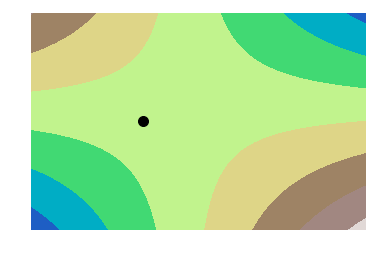

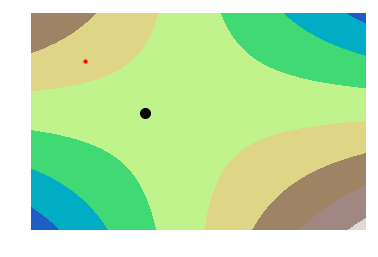

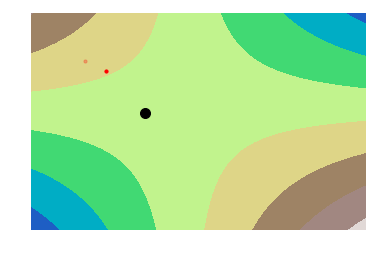

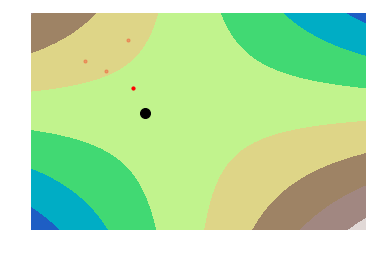

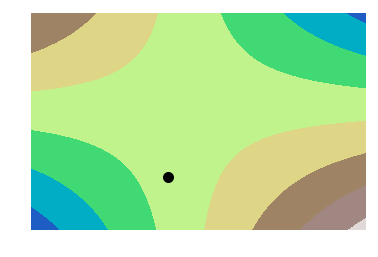

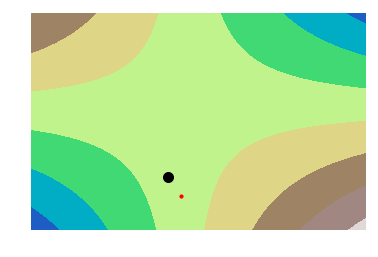

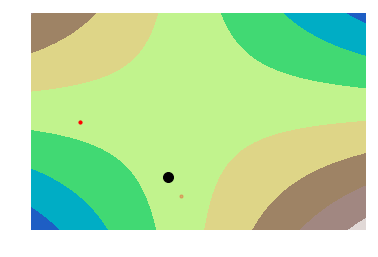

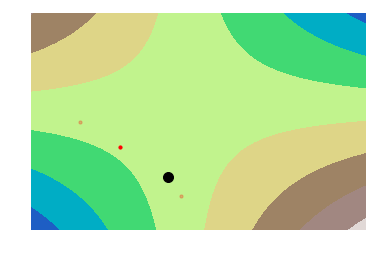

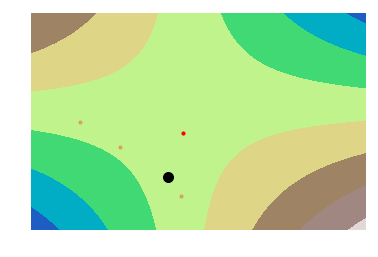

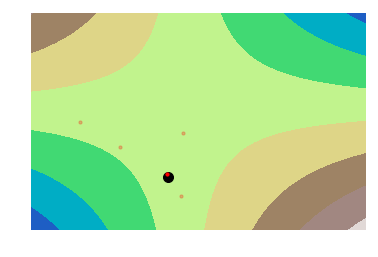

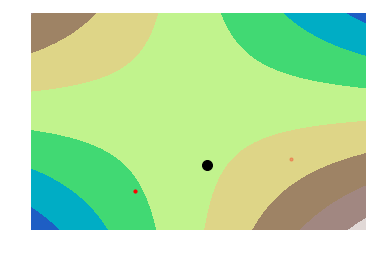

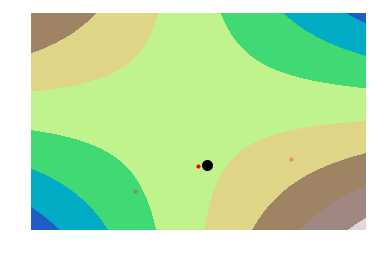

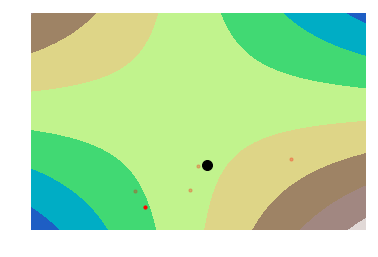

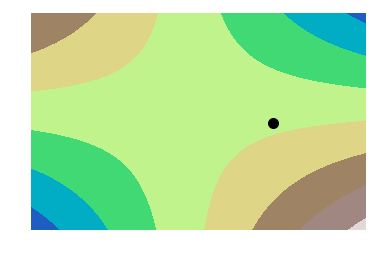

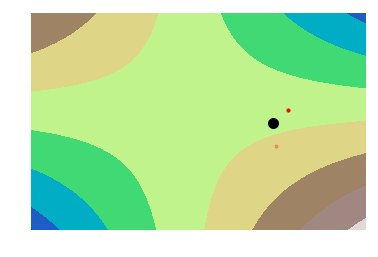

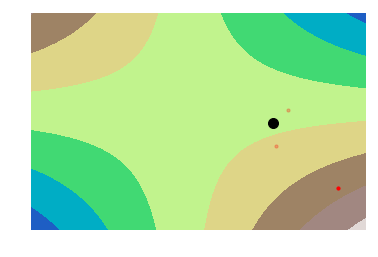

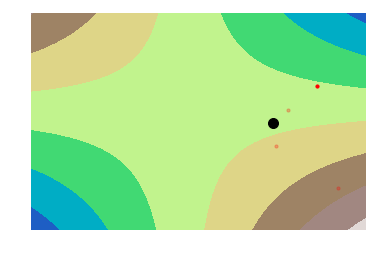

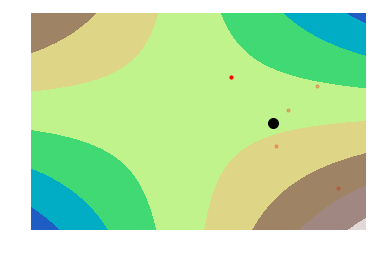

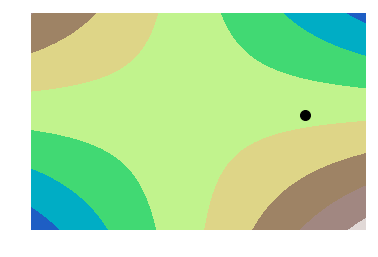

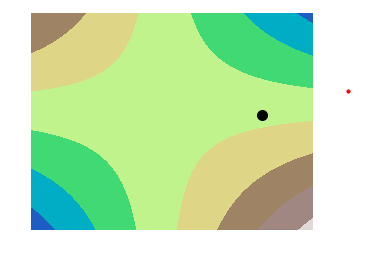

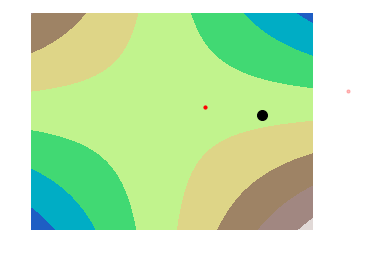

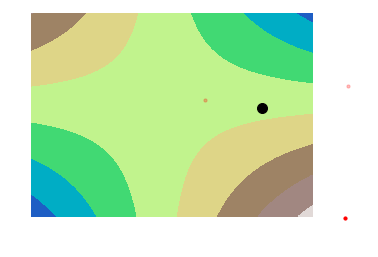

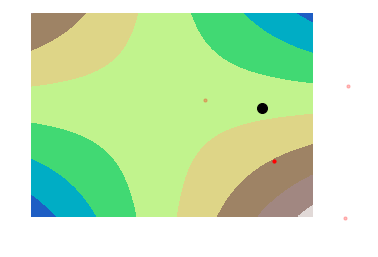

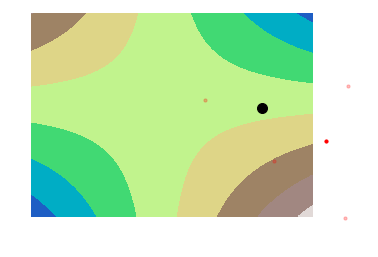

In [12]:
x0= np.array((-1., 0.));
x= x0;

plt.figure();
ax= plt.contourf(X, Y, Z,
                 cmap= 'terrain');
plt.scatter(x[0], x[1], c= 'k', s= 100.0);
plt.axis('off');
plt.show();

# L= 0.5 + np.sqrt(0.5)*np.random.randn(10);
theta= 2*math.pi*np.random.rand(10);
L= np.array((0.21167805,  1.79312417, -0.76918277, -1.63952824,  0.61111341,
        1.1608085 ,  1.06164864,  0.75759185,  2.20468542,  0.23355569));
theta= np.array((1.39524186, 4.93783168, 3.5637427 , 3.91971108, 0.40018393,
       1.27580373, 2.50643195, 6.17909395, 4.40375718, 5.14077141));

for i in range(5):
    x[0]= x[0] + L[i]*np.cos(theta[i]);
    x[1]= x[1] + L[i]*np.sin(theta[i]);
    plt.figure();
    ax= plt.contourf(X, Y, Z,
                     cmap= 'terrain');
    plt.scatter(x[0], x[1], c= 'k', s= 100.0);
    plt.axis('off');
    plt.savefig('../Saberseminar2019/lecture/graphics/wander_step'
                + str(i) + '_nogps.pdf',
            bbox_inches= 'tight',
            transparent= True);
    plt.show();
    eps= math.sqrt(0.6)*np.random.randn(5, 2);
    y= np.zeros(eps.shape);
    
    for j in range(5):
        y[j, 0]= x[0] + eps[j, 0];
        y[j, 1]= x[1] + eps[j, 1];
        
        plt.figure();
        ax= plt.contourf(X, Y, Z,
                         cmap= 'terrain');
        plt.scatter(x[0], x[1], c= 'k', s= 100.0);
        plt.scatter(y[:j, 0], y[:j, 1], c= 'r', s= 10.0, alpha= 0.25);
        plt.scatter(y[j, 0], y[j, 1], c= 'r', s= 10.0);
        plt.axis('off');
        plt.savefig('../Saberseminar2019/lecture/graphics/wander_step'
            + str(i) + '_gps' + str(j) + '.pdf',
        bbox_inches= 'tight',
        transparent= True);
        plt.show();

        


In [6]:
theta

array([1.39524186, 4.93783168, 3.5637427 , 3.91971108, 0.40018393,
       1.27580373, 2.50643195, 6.17909395, 4.40375718, 5.14077141])